# Problem_Statement(Zoo)
- Implement a KNN model to classify the animals in to categorie

In [1]:
#Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold,LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\KNN\Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#Check the size of data
df.shape

(101, 18)

In [4]:
#check the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
#Desciptive Statestics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


# Exploratory data analysis (EDA)

In [7]:
#Check for duplicated:
df.duplicated().sum()

0

In [8]:
#Check for null values:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [11]:
#check if there are duplicates in animal_name
duplicates = df['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [12]:
frog = df[df['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [13]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
df['animal name'][(df['venomous'] == 1 ) & (df['animal name'] == 'frog')] = "frog2"

In [14]:
df['animal name'].value_counts()

aardvark    1
polecat     1
seal        1
seahorse    1
scorpion    1
           ..
goat        1
gnat        1
girl        1
giraffe     1
wren        1
Name: animal name, Length: 101, dtype: int64

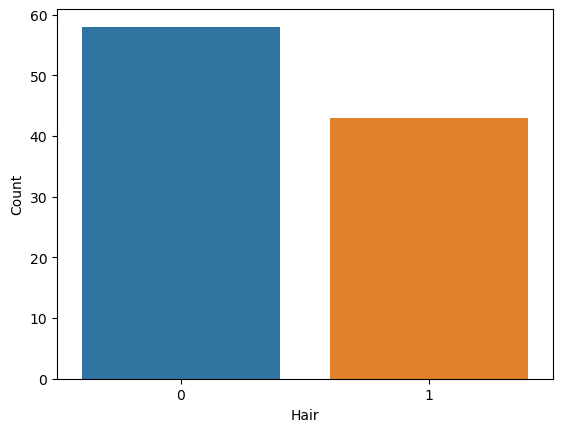

0    58
1    43
Name: hair, dtype: int64

In [16]:
sns.countplot(x="hair", data=df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
df.loc[:,'hair'].value_counts()

[]

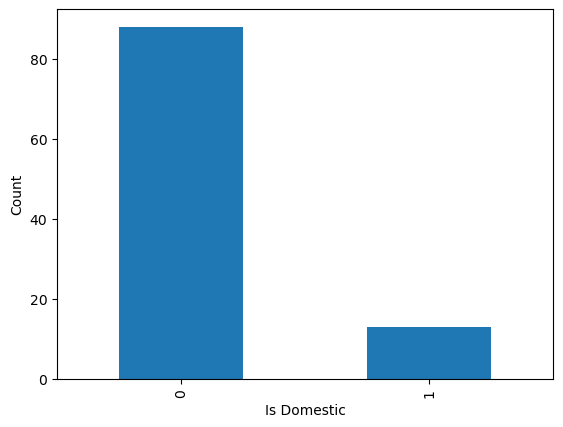

In [22]:
# Lets plot how many animals are domestic or not
df['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

- So we can see mostly animals are not domestic.

<AxesSubplot:xlabel='type'>

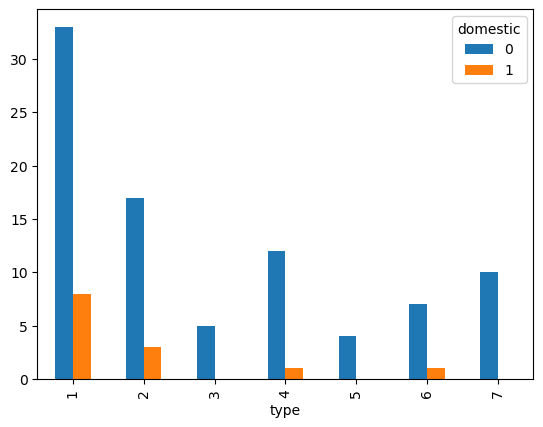

In [24]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df['type'], df['domestic']).plot(kind='bar')

- First category has a highest domastic animals.
- Third and Seventh category has no domastic animals.

0    60
1    41
Name: milk, dtype: int64

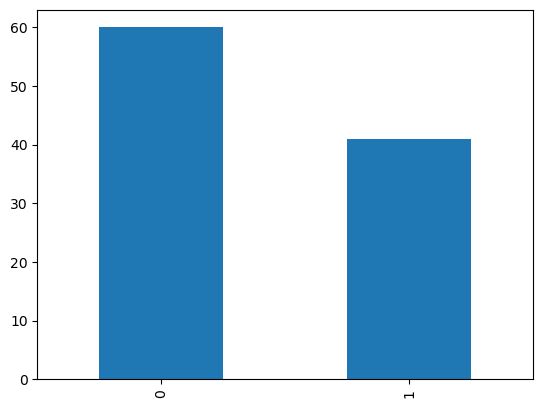

In [26]:
# Lets see how many animals provides us milk
df['milk'].value_counts().plot(kind='bar')
df['milk'].value_counts()

- 60 Animals are not provided mik. and only 41 Animals are provided milk

In [27]:
#So there are 41 animals in the list which provides us milk. Lets see to which category they belongs
pd.crosstab(df['type'],df['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


- Only first category animals are provided the milk

0    65
1    36
Name: aquatic, dtype: int64

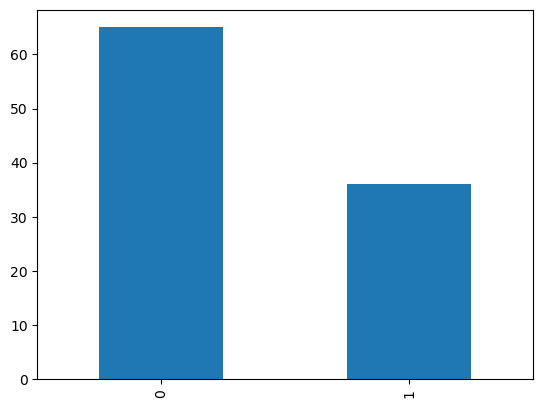

In [31]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
df['aquatic'].value_counts().plot(kind='bar')
df.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

<AxesSubplot:title={'center':'catagory wise aquatics animals'}, xlabel='type'>

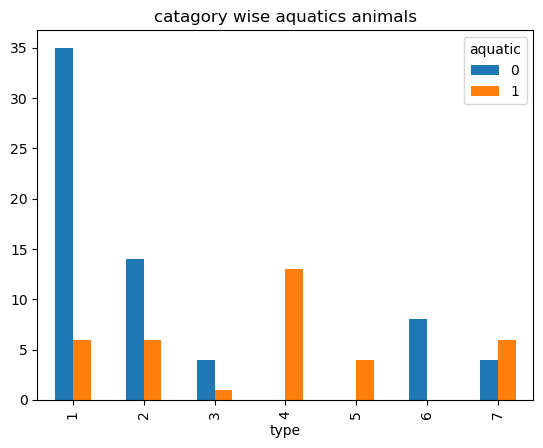

In [33]:
#let see catagory wise how much animals are aquatics
pd.crosstab(df['type'], df['aquatic']).plot(kind='bar',title='catagory wise aquatics animals')

<AxesSubplot:xlabel='type', ylabel='count'>

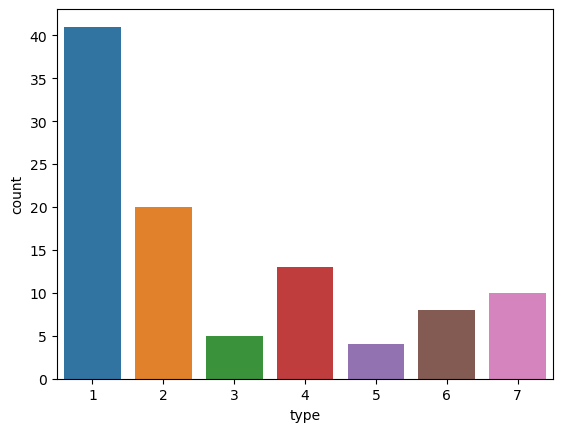

In [35]:
#Type wise distribution
sns.countplot(df['type'])

# Model Building

In [41]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [45]:
x=df.iloc[:,1:17]
y=df['type']

In [46]:
#Split the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

### Tain_Test_Split Model Validation Technique

In [48]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.72      0.82      0.74        21
weighted avg       0.92      0.90      0.90        21

0.875
0.9047619047619048


### KFold_Technique

In [53]:
kf=KFold(n_splits=10)
scores=cross_val_score(knn,x,y,cv=kf)
scores

array([1. , 0.7, 1. , 1. , 0.9, 1. , 0.8, 0.6, 0.9, 0.9])

In [54]:
scores.mean()

0.8800000000000001

### Leave_One_Out_Technique

In [51]:
lo=LeaveOneOut()
scores1=cross_val_score(knn,x,y,cv=lo)
scores1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
scores1.mean()

0.8811881188118812

# Grid Search for Algorithm Tuning

In [55]:
acc=[]

for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred1=knn.predict(xtest)
    acc.append(knn.score(xtest,ytest))

In [56]:
acc

[0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619]

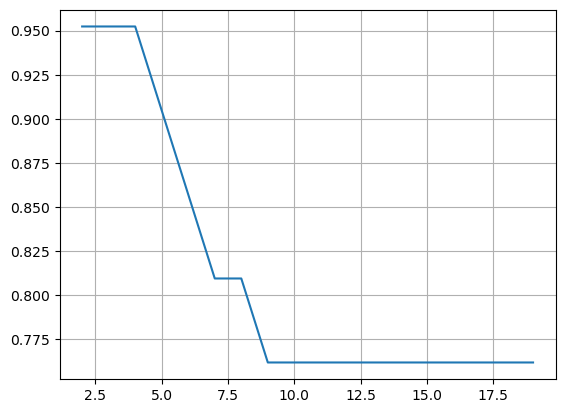

In [57]:
plt.plot(range(2,20),acc)
plt.grid()

- so we can see from above graph accuracy is high(95%) at n_neighbors=1,2 and 3.
- so we will create a model with n_neighbors=2

In [67]:
#Build a final model
model=KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
ypred_1=model.predict(xtest)
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



In [68]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.975
0.9523809523809523


# Hyperparameter Tuning for model

In [61]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [62]:
trainac

[1.0,
 0.9875,
 0.975,
 0.9125,
 0.875,
 0.875,
 0.8375,
 0.8,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875,
 0.7875]

In [63]:
testac

[0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619]

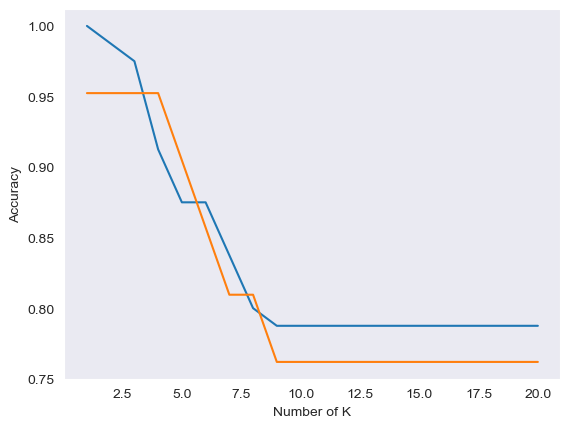

In [64]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

# Find out Mamimum Accuracy for KFold technique at what n_neighbors

In [72]:
k_range = range(2, 57)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=kf)
    k_scores.append(scores.mean())

In [73]:
k_scores

[0.9400000000000001,
 0.9400000000000001,
 0.9199999999999999,
 0.8800000000000001,
 0.8600000000000001,
 0.8400000000000001,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.76,
 0.72,
 0.7100000000000001,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6618181818181819,
 0.6327272727272728,
 0.6227272727272728,
 0.5827272727272728,
 0.5827272727272728,
 0.5827272727272728,
 0.5827272727272728,
 0.5727272727272726,
 0.5727272727272726,
 0.5627272727272727,
 0.5627272727272727,
 0.5627272727272727,
 0.5527272727272726,
 0.5527272727272726,
 0.5427272727272727,
 0.5327272727272727,
 0.5327272727272727,
 0.5127272727272727,
 0.5027272727272727,
 0.5127272727272728,
 0.5127272727272728,
 0.5027272727272727,
 0.4927272727272728,
 0.4827272727272727,
 0.4827272727272727,
 0.4627272727272727]

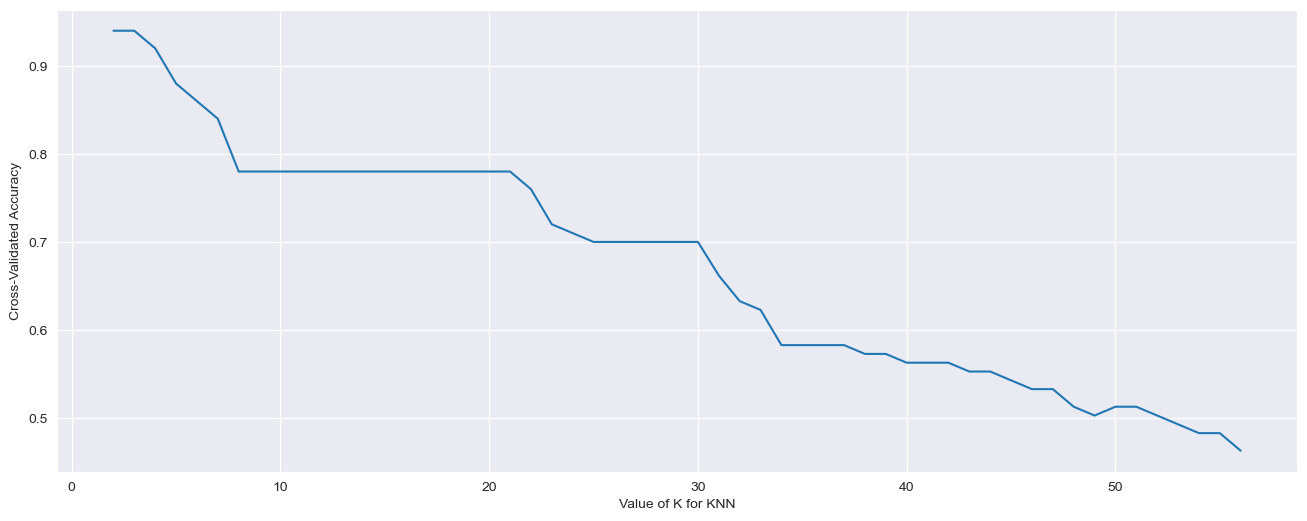

In [74]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Mamimum Accuracy (94%) for Kfold technique at k=3 n_neighbors

# Find out Mamimum Accuracy for Leave One Out technique at what n_neighbors

In [79]:
k_range = range(2, 57)
lo_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=lo)
    lo_scores.append(scores.mean())

In [80]:
lo_scores

[0.9306930693069307,
 0.9504950495049505,
 0.9207920792079208,
 0.8811881188118812,
 0.8811881188118812,
 0.8316831683168316,
 0.8118811881188119,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7821782178217822,
 0.7722772277227723,
 0.7425742574257426,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.7029702970297029,
 0.6534653465346535,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5742574257425742,
 0.5544554455445545,
 0.5544554455

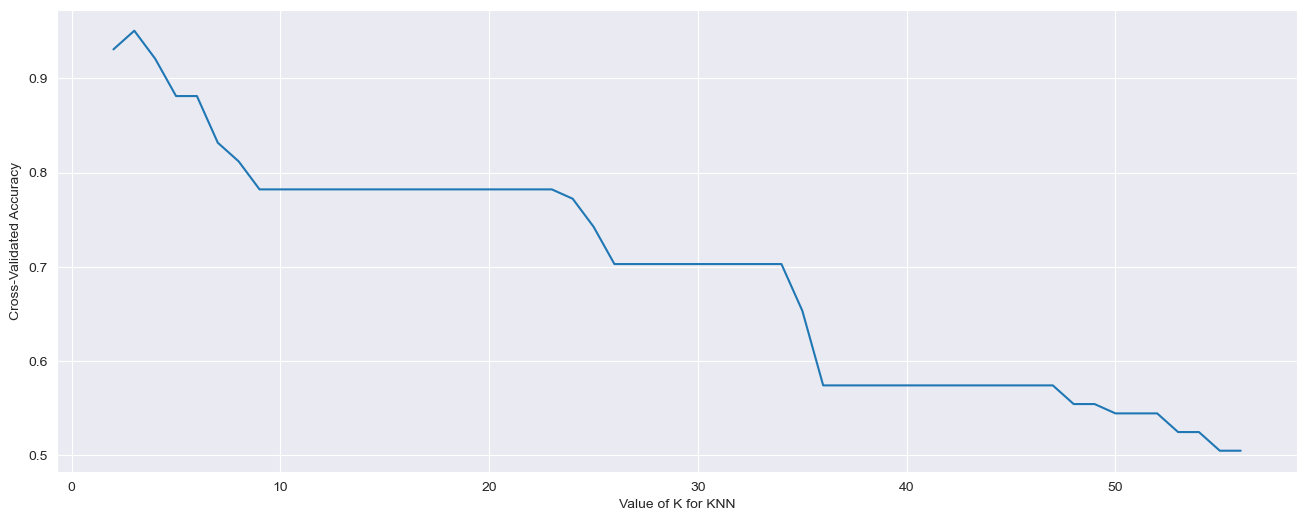

In [81]:
plt.figure(figsize=(16,6))
plt.plot(k_range, lo_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Mamimum Accuracy(95%) for leave one out technique at k=3 n_neighbors

## So we get the maximum accuracy=95% with train test split and leave One Out validation technique with generaised model, so we will final that final model.

In [83]:
#final Build a final model
final_model_1=KNeighborsClassifier(n_neighbors=3)
final_model_1.fit(xtrain,ytrain)
ypred_11=final_model_1.predict(xtest)
print(classification_report(ytest,ypred_11))
print('Training accuracy',final_model_1.score(xtrain,ytrain))
print('Testing accuracy',final_model_1.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21

Training accuracy 0.975
Testing accuracy 0.9523809523809523


In [84]:
lo=LeaveOneOut()
scores1=cross_val_score(final_model_1,x,y,cv=lo)
scores1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
scores1.mean()

0.9504950495049505

In [86]:
kf=KFold(n_splits=10)
scores=cross_val_score(final_model_1,x,y,cv=kf)
scores

array([1. , 0.9, 1. , 1. , 1. , 1. , 1. , 0.7, 0.9, 0.9])

In [87]:
scores.mean()

0.9400000000000001